<a href="https://colab.research.google.com/github/1gc23ai012/first-repo/blob/main/fake_news_detection_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('News.csv', index_col=0, on_bad_lines='skip', engine='python')
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [60]:
data.shape

(3082, 5)

In [61]:
data = data.drop(["title", "subject","date"], axis = 1)

In [62]:
data.isnull().sum()

,0
text,0
class,0


In [63]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

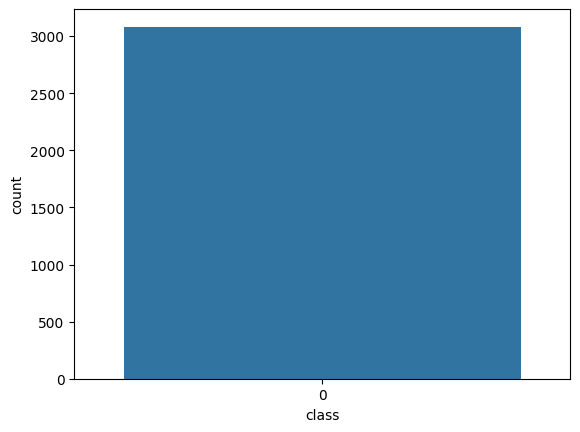

In [64]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [65]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [67]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 3082/3082 [02:52<00:00, 17.90it/s]


In [76]:
preprocessed_true_news = preprocess_text(true_data['text'].values)
true_data['text'] = preprocessed_true_news

100%|██████████| 21417/21417 [14:30<00:00, 24.59it/s]


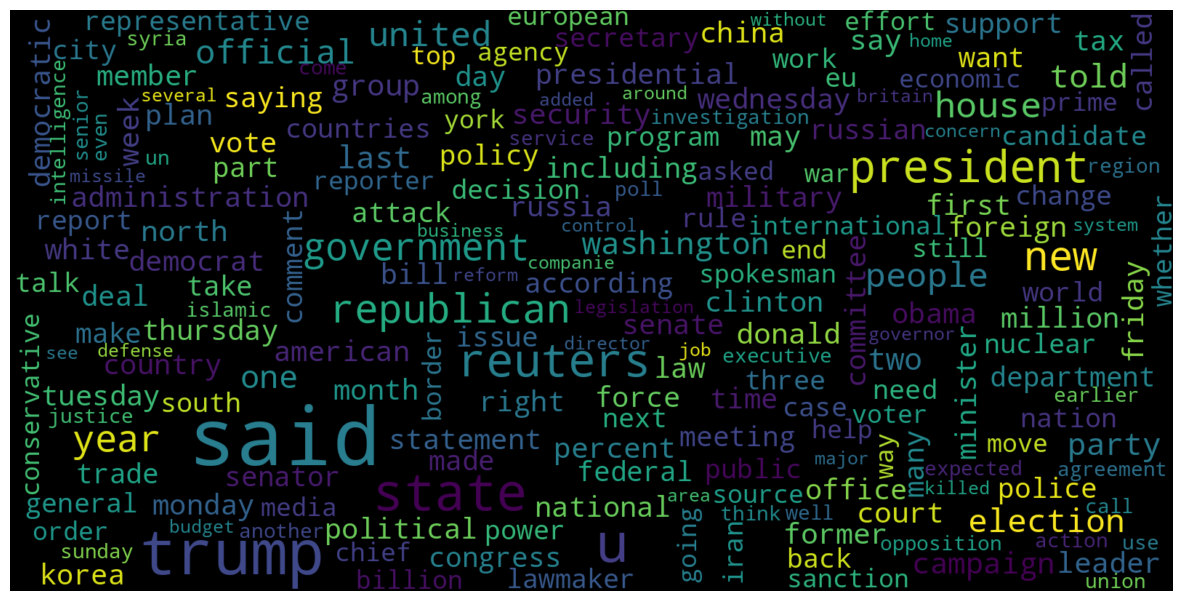

In [77]:
# Real News Word Cloud from true_data
consolidated_true_news = ' '.join(word for word in true_data['text'].astype(str))

# Check if consolidated string is empty before generating word cloud
if not consolidated_true_news.strip():
    print("No words found for 'Real' news to generate a word cloud from true_data. Please check the data or preprocessing steps.")
else:
    wordCloud = WordCloud(width=1600,
                          height=800,
                          random_state=21,
                          max_font_size=110,
                          collocations=False)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(consolidated_true_news), interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [81]:
preprocessed_Fake_news = preprocess_text(fake_news['text'].values)
fake_news['text'] = preprocessed_Fake_news

100%|██████████| 23481/23481 [16:48<00:00, 23.27it/s]


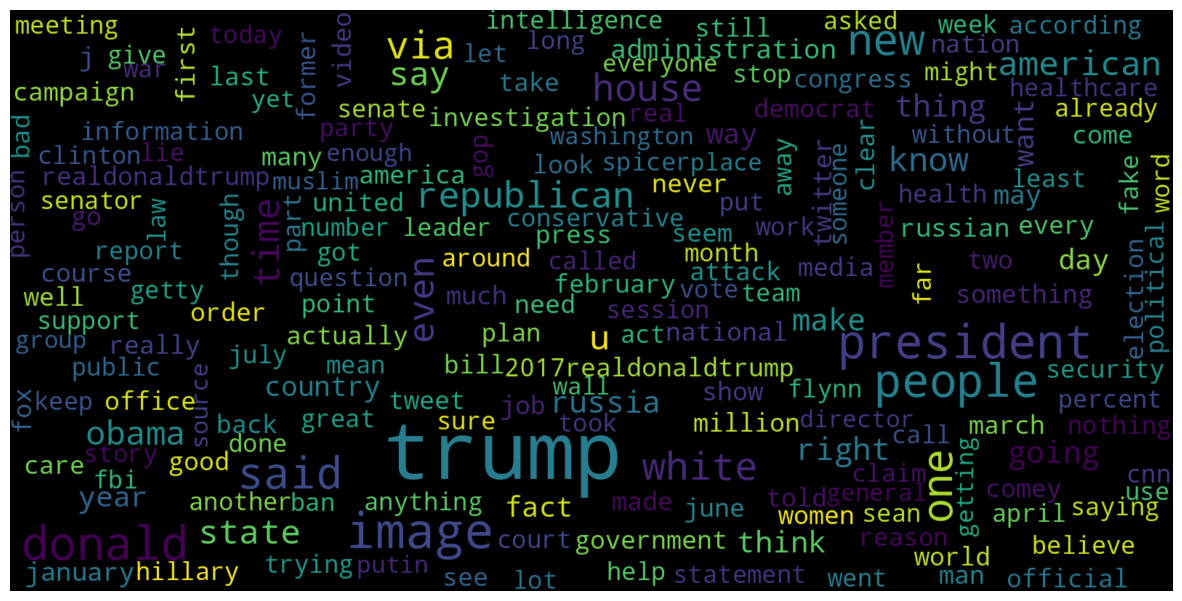

In [88]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

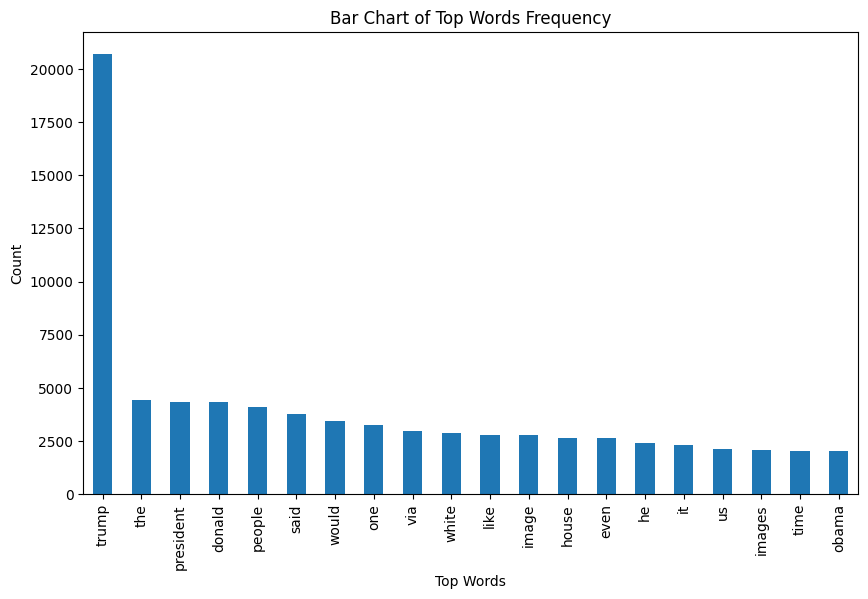

In [89]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [97]:
true_data = pd.read_csv('True.csv', index_col=0)
true_data.head()

,text,subject,date
title,,,
"As U.S. budget fight looms, Republicans flip their fiscal script",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [99]:
fake_news_data = pd.read_csv('Fake.csv', index_col=0)
fake_news_data.head()

,text,subject,date
title,,,
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Combining True and Fake News Data

First, we'll assign class labels to the preprocessed `true_news` (class 1) and `fake_news` (class 0) DataFrames, and then concatenate them into a single DataFrame for training.

In [104]:
true_news['class'] = 1
fake_news['class'] = 0

# Select only the 'text' and 'class' columns from both DataFrames
df_true = true_news[['text', 'class']]
df_fake = fake_news[['text', 'class']]

# Concatenate the true and fake news DataFrames
data = pd.concat([df_true, df_fake], ignore_index=True)

# Shuffle the combined dataset
data = data.sample(frac=1).reset_index(drop=True)

display(data.head())

,text,class
0,WASHINGTON (Reuters) - Rex Tillerson arrived i...,1
1,"SAVONLINNA, Finland (Reuters) - President Vlad...",1
2,sorry david tough talk comes little late brita...,0
3,donald trump second amendment threat took frig...,0
4,how many symptoms need uncovered hillary comes...,0


### Re-checking Class Distribution

Let's verify that the new `data` DataFrame now contains both classes.

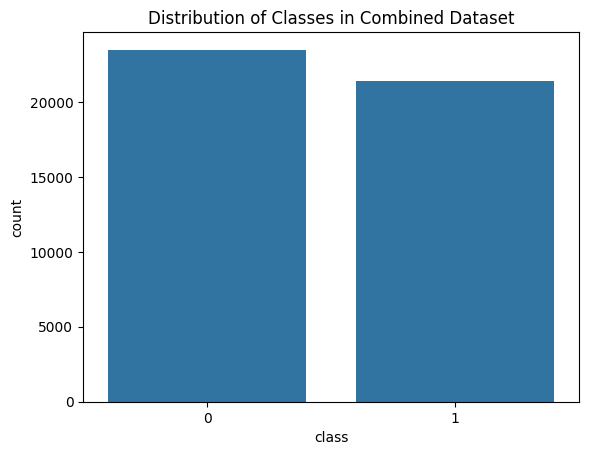

,count
class,
0,23481
1,21417


In [105]:
sns.countplot(data=data, x='class', order=data['class'].value_counts().index)
plt.title('Distribution of Classes in Combined Dataset')
plt.show()
data['class'].value_counts()

### Splitting and Vectorizing the Data

Now we can proceed with splitting the data into training and testing sets, and then vectorizing the text data using TF-IDF.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25,
                                                    random_state=42)

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (33673, 186435)
Shape of x_test: (11225, 186435)


### Training the Logistic Regression Model

With the data prepared, we can now train the Logistic Regression model.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

# Testing the model
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, model.predict(x_test))}')

Training Accuracy: 0.9996139340124135
Test Accuracy: 0.9993763919821826


In [108]:
data['class'].value_counts()

,count
class,
0,23481
1,21417


In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9996139340124135
0.9993763919821826


In [110]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703026163395
0.9991982182628062


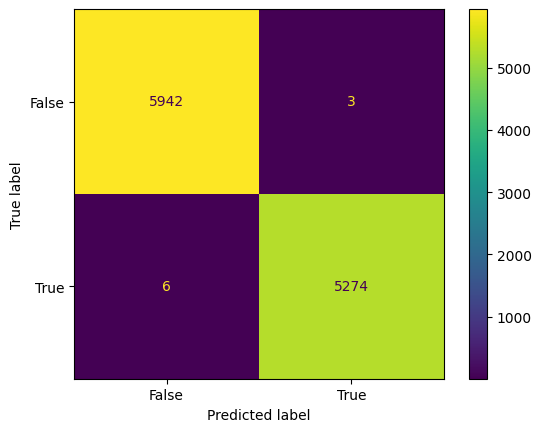

In [111]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()